In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml  #using openml to import data
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #transform different types

In [2]:
#Import dataset
X_initial, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
combine_dataset = pd.concat([X_initial, y], axis=1)
combine_dataset.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


## Passengers gender and ticket class based on survival

In [3]:
# features from the dataset
features = ['sex','pclass']
X = X_initial[features].copy()

In [4]:
X['sex'] = X['sex'].map({'female': 1, 'male': 0}).astype('int')
X['sex']

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1309, dtype: int32

In [5]:
numerical_features = ['sex']

# Applying SimpleImputer and StandardScaler into a pipelin
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_features = ['pclass']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [6]:
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

In [7]:
#pipelines with logistic regression:
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000))])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1)

C:\Users\e2u\anaconda3\envs\tenmsorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


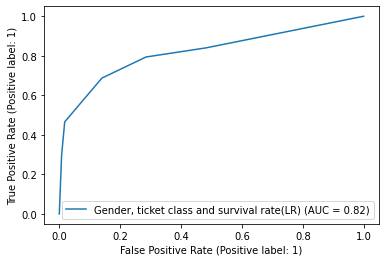

In [9]:
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, y_train);
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Gender, ticket class and survival rate(LR)')

## Passengers age per ticket class based on survival

In [10]:
# features from the dataset
features = ['age','pclass']
X = X_initial[features].copy()

#numerical
numerical_features = ['age']

# Applying SimpleImputer and StandardScaler into a pipelin
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

#categorical
categorical_features = ['pclass']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [11]:
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

#pipelines with logistic regression:
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000))])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1)

C:\Users\e2u\anaconda3\envs\tenmsorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


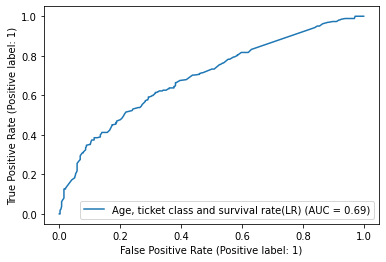

In [13]:
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, y_train);
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Age, ticket class and survival rate(LR)')

## Passenger age(bins), ticket class and survial

In [14]:
X_initial["age_cat1"] = pd.cut(X_initial["age"], bins=[0,10,20,30,40,50,60,70,80])

In [15]:
X_initial["age_cat"] = X_initial["age_cat1"].count()
X_initial["age_cat"]

0       1046
1       1046
2       1046
3       1046
4       1046
        ... 
1304    1046
1305    1046
1306    1046
1307    1046
1308    1046
Name: age_cat, Length: 1309, dtype: int64

In [16]:
# features from the dataset
features = ['age_cat','pclass']
X = X_initial[features].copy()

#numerical
numerical_features = ['age_cat']

# Applying SimpleImputer and StandardScaler into a pipelin
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

#categorical
categorical_features = ['pclass']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [17]:
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

#pipelines with logistic regression:
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000))])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1)

C:\Users\e2u\anaconda3\envs\tenmsorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


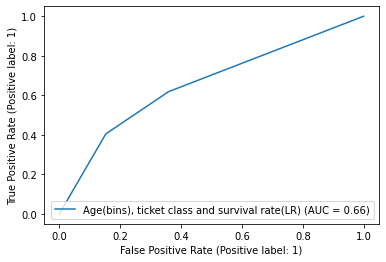

In [19]:
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, y_train);
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Age(bins), ticket class and survival rate(LR)')

# Family size and survival

In [20]:
#Import dataset
X_initial, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
combine_dataset = pd.concat([X_initial, y], axis=1)
combine_dataset.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [21]:
X_initial["family_size"] = (X_initial['sibsp']+X_initial['parch'])+1

In [22]:
# features from the dataset
features = ['family_size','pclass']
X = X_initial[features].copy()

In [23]:
numerical_features = ['family_size']

# Applying SimpleImputer and StandardScaler into a pipelin
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_features = ['pclass']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [24]:
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

#pipelines with logistic regression:
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000))])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1)

C:\Users\e2u\anaconda3\envs\tenmsorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


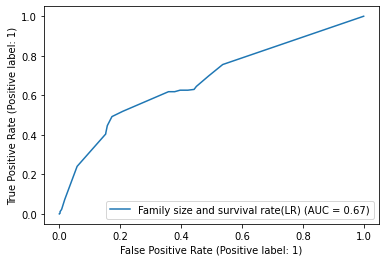

In [26]:
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, y_train);
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Family size and survival rate(LR)')

## Keras

In [27]:
#Import dataset
X_initial, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
combine_dataset = pd.concat([X_initial, y], axis=1)
combine_dataset.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [28]:
features = ['age', 'fare','embarked','sex','pclass']
X = X_initial[features].copy()
X

,age,fare,embarked,sex,pclass
0,29.0000,211.3375,S,female,1.0
1,0.9167,151.5500,S,male,1.0
2,2.0000,151.5500,S,female,1.0
3,30.0000,151.5500,S,male,1.0
4,25.0000,151.5500,S,female,1.0
...,...,...,...,...,...
1304,14.5000,14.4542,C,female,3.0
1305,NaN,14.4542,C,female,3.0
1306,26.5000,7.2250,C,male,3.0
1307,27.0000,7.2250,C,male,3.0


In [29]:
X.isnull().sum()

age         263
fare          1
embarked      2
sex           0
pclass        0
dtype: int64

In [30]:
#replace Na's
X[['age']] = X[['age']].fillna(value=X[['age']].mean())
X[['fare']] = X[['fare']].fillna(value=X[['fare']].mean())
X[['embarked']] = X[['embarked']].fillna(value=X['embarked'].value_counts().idxmax())

#convert


In [31]:
X.isnull().sum()

age         0
fare        0
embarked    0
sex         0
pclass      0
dtype: int64

In [32]:
#convert
X['sex'] = X['sex'].map({'female': 1, 'male': 0}).astype('int')
X['age'] = X['age'].astype('int')
X['fare'] = X['fare'].astype('int')
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype('int')
X['pclass']=X['pclass'].astype('int')


In [33]:
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,age,fare,embarked,sex,pclass
0,-0.053121,3.442321,-0.603205,1.344482,-1.545507
1,-2.301214,2.282839,-0.603205,-0.743213,-1.545507
2,-2.146173,2.282839,-0.603205,1.344482,-1.545507
3,0.024399,2.282839,-0.603205,-0.743213,-1.545507
4,-0.363203,2.282839,-0.603205,1.344482,-1.545507


In [34]:
n_cols = X_norm.shape[1] # number of predictors
n_cols

5

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense



In [36]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

In [37]:
model = regression_model()

In [38]:
X_1 = X_norm.astype('float32')
Y_1 = y.astype('float32')

In [39]:
X_1

,age,fare,embarked,sex,pclass
0,-0.053121,3.442321,-0.603205,1.344482,-1.545507
1,-2.301214,2.282839,-0.603205,-0.743213,-1.545507
2,-2.146173,2.282839,-0.603205,1.344482,-1.545507
3,0.024399,2.282839,-0.603205,-0.743213,-1.545507
4,-0.363203,2.282839,-0.603205,1.344482,-1.545507
...,...,...,...,...,...
1304,-1.215928,-0.364645,0.927019,1.344482,0.841595
1305,-0.053121,-0.364645,0.927019,1.344482,0.841595
1306,-0.285683,-0.499918,0.927019,-0.743213,0.841595
1307,-0.208162,-0.499918,0.927019,-0.743213,0.841595


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.5,random_state=1)

In [41]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)


Epoch 1/100
21/21 - 0s - loss: 0.3669 - accuracy: 0.3471 - val_loss: 0.2628 - val_accuracy: 0.4305 - 318ms/epoch - 15ms/step
Epoch 2/100
21/21 - 0s - loss: 0.2224 - accuracy: 0.6667 - val_loss: 0.1936 - val_accuracy: 0.7237 - 29ms/epoch - 1ms/step
Epoch 3/100
21/21 - 0s - loss: 0.1695 - accuracy: 0.7829 - val_loss: 0.1553 - val_accuracy: 0.7664 - 31ms/epoch - 1ms/step
Epoch 4/100
21/21 - 0s - loss: 0.1510 - accuracy: 0.7829 - val_loss: 0.1499 - val_accuracy: 0.7756 - 30ms/epoch - 1ms/step
Epoch 5/100
21/21 - 0s - loss: 0.1461 - accuracy: 0.7905 - val_loss: 0.1473 - val_accuracy: 0.7847 - 30ms/epoch - 1ms/step
Epoch 6/100
21/21 - 0s - loss: 0.1422 - accuracy: 0.8012 - val_loss: 0.1479 - val_accuracy: 0.8000 - 29ms/epoch - 1ms/step
Epoch 7/100
21/21 - 0s - loss: 0.1392 - accuracy: 0.8150 - val_loss: 0.1460 - val_accuracy: 0.7969 - 30ms/epoch - 1ms/step
Epoch 8/100
21/21 - 0s - loss: 0.1378 - accuracy: 0.8211 - val_loss: 0.1464 - val_accuracy: 0.8076 - 30ms/epoch - 1ms/step
Epoch 9/100
21

Epoch 68/100
21/21 - 0s - loss: 0.1196 - accuracy: 0.8272 - val_loss: 0.1458 - val_accuracy: 0.8015 - 30ms/epoch - 1ms/step
Epoch 69/100
21/21 - 0s - loss: 0.1195 - accuracy: 0.8287 - val_loss: 0.1455 - val_accuracy: 0.8092 - 30ms/epoch - 1ms/step
Epoch 70/100
21/21 - 0s - loss: 0.1183 - accuracy: 0.8318 - val_loss: 0.1459 - val_accuracy: 0.7985 - 30ms/epoch - 1ms/step
Epoch 71/100
21/21 - 0s - loss: 0.1197 - accuracy: 0.8242 - val_loss: 0.1499 - val_accuracy: 0.7939 - 30ms/epoch - 1ms/step
Epoch 72/100
21/21 - 0s - loss: 0.1195 - accuracy: 0.8226 - val_loss: 0.1456 - val_accuracy: 0.7985 - 30ms/epoch - 1ms/step
Epoch 73/100
21/21 - 0s - loss: 0.1190 - accuracy: 0.8226 - val_loss: 0.1465 - val_accuracy: 0.8046 - 30ms/epoch - 1ms/step
Epoch 74/100
21/21 - 0s - loss: 0.1198 - accuracy: 0.8287 - val_loss: 0.1477 - val_accuracy: 0.8092 - 30ms/epoch - 1ms/step
Epoch 75/100
21/21 - 0s - loss: 0.1193 - accuracy: 0.8318 - val_loss: 0.1478 - val_accuracy: 0.8000 - 29ms/epoch - 1ms/step
Epoch 76

In [42]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('mean_squared_error: {}'.format(scores))

mean_squared_error: [0.1466463804244995, 0.8045801520347595]


In [43]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 

Accuracy: 0.8045801520347595% 
 Error: 0.19541984796524048
